In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, rankdata, wilcoxon, norm

In [41]:
# Example data: paired observations (e.g., pre-test and post-test scores)
pre_test_scores  = np.array([85, 90, 78, 92, 88, 76, 95, 89, 77, 91])
post_test_scores = np.array([88, 87, 80, 94, 90, 79, 97, 85, 75, 93])


In [42]:
# Perform the Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(pre_test_scores, post_test_scores)

print(f"Wilcoxon Signed-Rank Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired samples.")

Wilcoxon Signed-Rank Test Statistic: 21.5
P-value: 0.556640625
Fail to reject the null hypothesis: There is no significant difference between the paired samples.


In [43]:
stat

21.5

#### manual method

In [44]:
# Calculate Differences
differences = post_test_scores - pre_test_scores
differences

array([ 3, -3,  2,  2,  2,  3,  2, -4, -2,  2])

In [45]:
# Remove zero differences (not needed in this case as there are no zeros)
non_zero_differences = differences[differences != 0]
non_zero_differences

array([ 3, -3,  2,  2,  2,  3,  2, -4, -2,  2])

rankdata

In [46]:
rankdata([1, 10, 4, 5])

array([1., 4., 2., 3.])

In [47]:
# Calculate Ranks
ranks = rankdata(abs(non_zero_differences))
ranks

array([ 8. ,  8. ,  3.5,  3.5,  3.5,  8. ,  3.5, 10. ,  3.5,  3.5])

In [48]:
ranks * np.sign(non_zero_differences)

array([  8. ,  -8. ,   3.5,   3.5,   3.5,   8. ,   3.5, -10. ,  -3.5,
         3.5])

In [49]:
# Assign signs to ranks
signed_ranks = ranks * np.sign(non_zero_differences)

In [50]:
# Sum of positive and negative ranks
W_plus  = np.sum(signed_ranks[signed_ranks > 0])
W_minus = np.sum(-signed_ranks[signed_ranks < 0])

In [52]:
# W statistic
W_statistic = min(W_plus, W_minus)
W_statistic

21.5

In [54]:
print(f"W_plus: {W_plus}, W_minus: {W_minus}, W_statistic: {W_statistic}")

W_plus: 33.5, W_minus: 21.5, W_statistic: 21.5


**Determine the Critical Value and P-value**

In [56]:
# Number of non-zero differences
n     = len(non_zero_differences)
alpha = 0.05

In [59]:
1 - alpha / 2

0.975

In [60]:
# Calculate the critical z-value for a two-tailed test
z_critical = norm.ppf(1 - alpha / 2)
z_critical

1.959963984540054

In [61]:
# Calculate the standard deviation of the rank sums
std_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)

In [62]:
# Calculate the critical value
critical_value = z_critical * std_W
critical_value

19.228635195764923

- alpha is the significance level, typically 0.05 for a 95% confidence level.
- 1 - alpha/2 gives the critical z-value for a two-tailed test at the specified significance level. 
- For a 95% confidence level, alpha is 0.05, so 1 - alpha/2 is 0.975. 
- This corresponds to the z-value that cuts off the upper 2.5% of the distribution in a two-tailed test.

np.sqrt(n * (n + 1) * (2 * n + 1) / 24):

This is the standard deviation of the sampling distribution of the Wilcoxon Signed-Rank Test statistic under the null hypothesis.

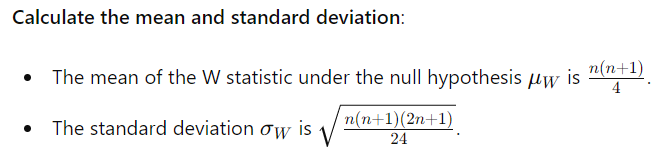

In [63]:
# Calculate mean and standard deviation for the W distribution
mean_W = n * (n + 1) / 4
std_W  = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)

In [64]:
# Calculate the z-score for the W statistic
z = (W_statistic - mean_W) / std_W

In [65]:
# Calculate PDF and CDF for the normal approximation
pdf_value = norm.pdf(z)
cdf_value = norm.cdf(z)

In [66]:
# Compute the p-value
p_value = 2 * (1 - norm.cdf(abs(z)))  # two-tailed test
p_value

0.5408179042426178

In [67]:

print(f"Critical z-value: {z_critical:.2f}")
print(f"Standard deviation of W: {std_W:.2f}")
print(f"Critical value for 95% significance level: {critical_value:.2f}")
print(f"W Statistic: {W_statistic}")
print(f"PDF value for W statistic: {pdf_value:.4f}")
print(f"CDF value for W statistic: {cdf_value:.4f}")
print(f"P-value: {p_value:.4f}")

Critical z-value: 1.96
Standard deviation of W: 9.81
Critical value for 95% significance level: 19.23
W Statistic: 21.5
PDF value for W statistic: 0.3309
CDF value for W statistic: 0.2704
P-value: 0.5408


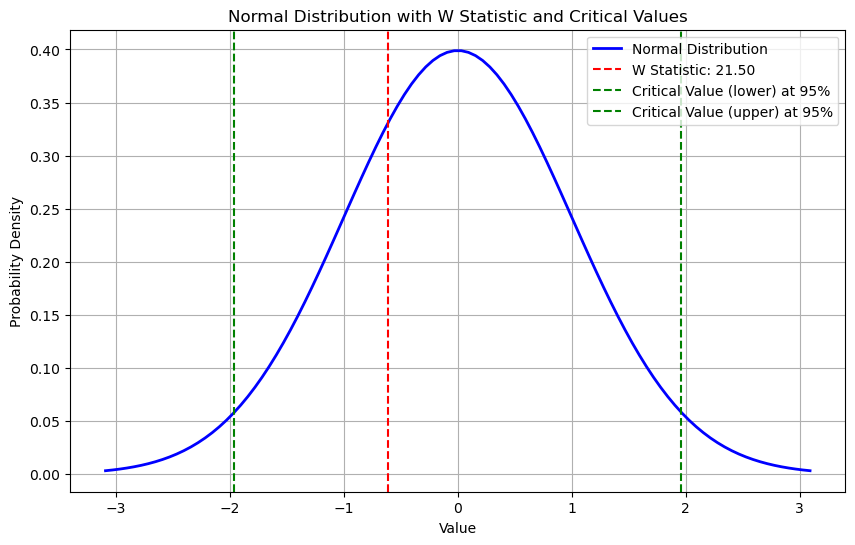

In [68]:
# Plot the normal distribution and the critical value
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x), 'b-', lw=2, label='Normal Distribution')
plt.axvline(x=z, color='red', linestyle='--', label=f'W Statistic: {W_statistic:.2f}')
plt.axvline(x=norm.ppf(alpha / 2), color='green', linestyle='--', label='Critical Value (lower) at 95%')
plt.axvline(x=norm.ppf(1 - alpha / 2), color='green', linestyle='--', label='Critical Value (upper) at 95%')
plt.title('Normal Distribution with W Statistic and Critical Values')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Conclusion: The high p-value (0.5408) indicates that the observed difference is not statistically significant. Despite the W statistic being greater than the critical value, the p-value takes precedence in hypothesis testing, confirming we should not reject the null hypothesis.